<a href="https://colab.research.google.com/github/Sudorenkoroma/HW_GI_ML/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [47]:
# Підключаємося до drive диску
drive.mount('/content/drive')

# Завантажуємо датасети у форматі pd
data_2d = pd.read_csv("/content/drive/MyDrive/Code/HW6/data/data_2d.csv")
mnist = pd.read_csv("/content/drive/MyDrive/Code/HW6/data/mnist.csv")

# Обрізаємо перші рядки які містять мітки
data_2d = data_2d.iloc[:, 1:]
mnist = mnist.iloc[:, 1:]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


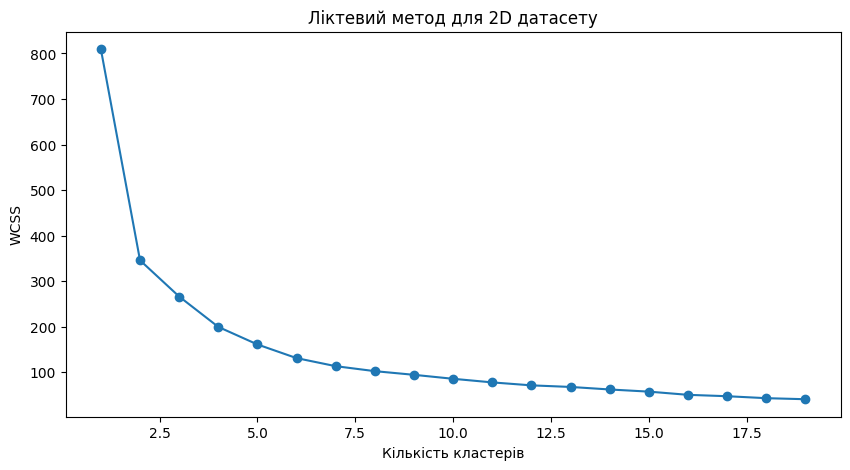

[809.2157980450892,
 345.7643186217374,
 266.2212557807085,
 199.54204581357897,
 160.99760893420077,
 131.01973682918492,
 113.31599066407688,
 102.38137412026512,
 94.34091267307309,
 85.61188749259617,
 77.70349427874856,
 71.21909001721585,
 67.72719420669739,
 62.16606706625912,
 57.44011900773957,
 50.40697019734378,
 47.36948993742419,
 43.06209331225699,
 40.771994357190806]

In [48]:
# Функція для визначення оптимальної кількості кластерів
def calculate_wcss(data, k_num):
    wcss = []
    for n in k_num:
        kmeans = KMeans(n_clusters=n, n_init='auto', random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

k_num = range(1, 20)

# Розрахунок WCSS для 2D датасету
wcss_2d = calculate_wcss(data_2d, k_num)


# Візуалізація ліктевого графіка для 2D датасету
plt.figure(figsize=(10, 5))
plt.plot(k_num, wcss_2d, marker='o')
plt.title('Ліктевий метод для 2D датасету')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.show()

wcss_2d

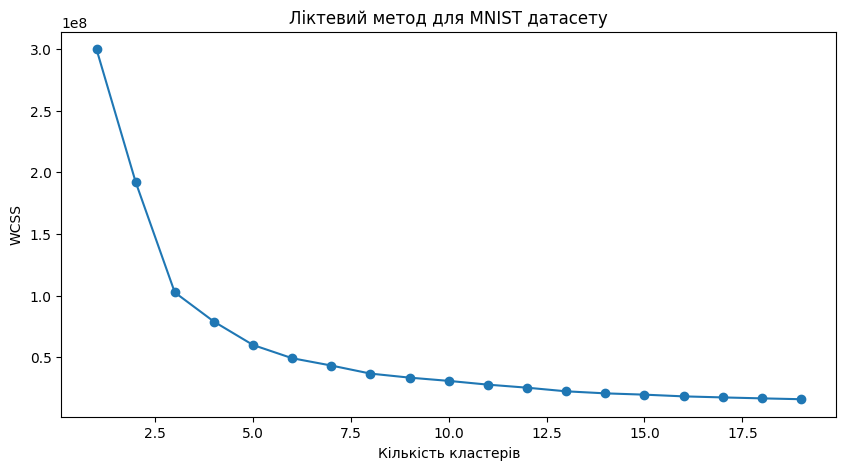

[299828793.0519079,
 192110723.3280267,
 102514564.09998207,
 78838871.10274266,
 59860353.45537543,
 49131428.10412814,
 43197565.19217152,
 36662284.600722164,
 33384363.057899788,
 30748265.756877914,
 27700900.05819059,
 25235936.488593288,
 22290722.537413947,
 20633371.7108166,
 19583263.635457374,
 18186827.09329094,
 17340242.066006154,
 16570204.542156398,
 15875627.185337603]

In [49]:
# Зменшення розмірності MNIST датасету
pca = PCA(n_components=2)
mnist_2d = pca.fit_transform(mnist)

# Розрахунок WCSS для MNIST датасету
wcss_mnist = calculate_wcss(mnist_2d, k_num)

# Візуалізація ліктевого графіка для MNIST датасету
plt.figure(figsize=(10, 5))
plt.plot(k_num, wcss_mnist, marker='o')
plt.title('Ліктевий метод для MNIST датасету')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.show()

wcss_mnist

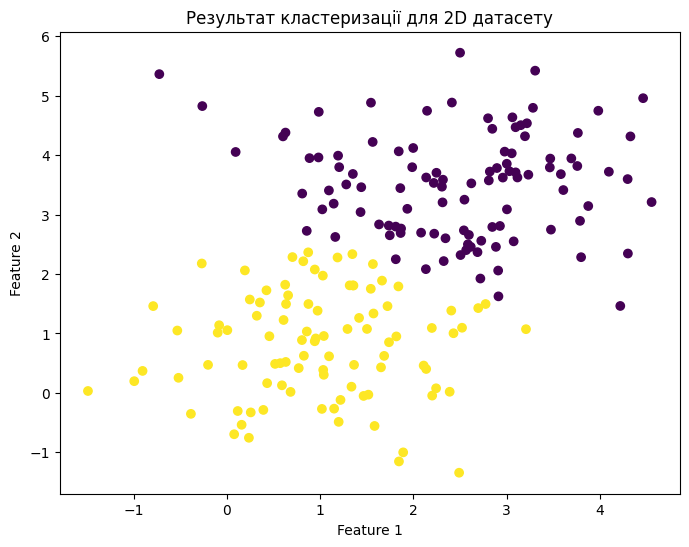

In [50]:
# Вибираємо оптимальну кількість кластерів (візуально їх там 2, але я не впевнений)
optimal_clusters_2d = 2

# Застосування K-means з обраною кількістю кластерів
kmeans_2d = KMeans(n_clusters=optimal_clusters_2d, n_init='auto', random_state=42)
clusters_2d = kmeans_2d.fit_predict(data_2d)

# Візуалізація результатів кластеризації для 2D датасету
plt.figure(figsize=(8, 6))
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=clusters_2d, marker='o')
plt.title('Результат кластеризації для 2D датасету')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

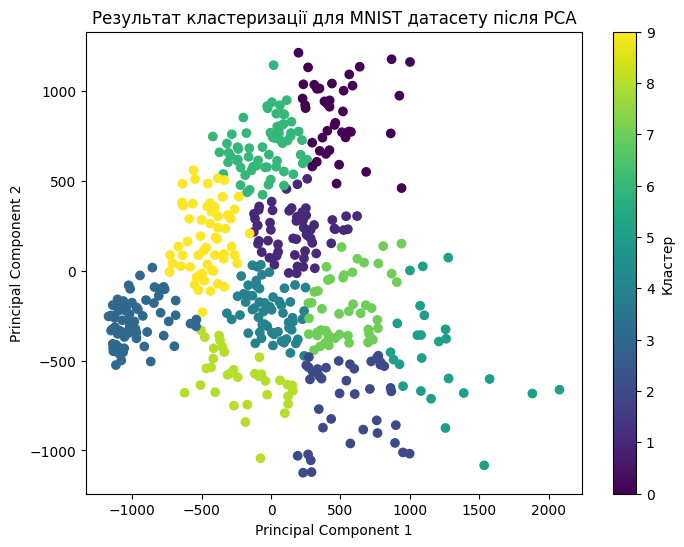

In [53]:
# Вибираємо оптимальну кількість кластерів (візуально на ліктевому графіку їх там 3, але по міткам видно що їх 10)
optimal_clusters_mnist = 10

# Застосування K-means з обраною кількістю кластерів
kmeans_mnist = KMeans(n_clusters=optimal_clusters_mnist, n_init='auto', random_state=42)
clusters_mnist = kmeans_mnist.fit_predict(mnist_2d)

# Візуалізація результатів кластеризації для MNIST датасету
plt.figure(figsize=(8, 6))
plt.scatter(mnist_2d[:, 0], mnist_2d[:, 1], c=clusters_mnist, cmap='viridis', marker='o')
plt.title('Результат кластеризації для MNIST датасету після PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Кластер')
plt.show()